In [1]:
import pandas as pd
import numpy as np
import sklearn as skl
from matplotlib import pyplot as plt

In [2]:
import seaborn as sns
%matplotlib inline

In [3]:
# load df from csv
df = pd.read_csv('athlete_events.csv').drop_duplicates().drop('ID', axis=1)
nocdf = pd.read_csv('noc_regions.csv')

In [4]:
medal_category = pd.Categorical(['N/A', 'Bronze', 'Silver', 'Gold'], categories=['N/A', 'Bronze', 'Silver', 'Gold'], ordered=True)
df['Medal'] = df['Medal'].fillna('N/A').astype(medal_category)

In [5]:
drop_col_set = set(df.columns)
drop_col_set -= set(["Medal"])

df = df.sort_values(by='Medal', ascending=True).drop_duplicates(list(drop_col_set), keep='last').sort_values(by='Games', ascending=True)

In [6]:
df.describe()

,Age,Height,Weight,Year
count,260365.000000,210916.000000,208203.000000,269661.000000
mean,25.452887,175.338964,70.701810,1978.641049
std,6.160548,10.518531,14.349054,29.734037
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1988.000000
75%,28.000000,183.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


In [7]:
df.describe(include=['O'])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event
count,269661,269661,269661,269661,269661,269661,269661,269661,269661
unique,134732,2,1184,230,51,2,42,66,765
top,Heikki Ilmari Savolainen,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football
freq,39,195286,17598,18603,13821,221097,22291,38624,5733


In [8]:
male_df = df[df.Sex == 'M'].drop('Games', axis=1)
female_df = df[df.Sex == 'F'].drop('Games', axis=1)

In [9]:
winter_male_df = male_df[male_df.Season == 'Winter'].drop('Season', axis=1)
summer_male_df = male_df[male_df.Season == 'Summer'].drop('Season', axis=1)
winter_female_df = female_df[female_df.Season == 'Winter'].drop('Season', axis=1)
summer_female_df = female_df[female_df.Season == 'Summer'].drop('Season', axis=1)

In [10]:
display({
    'Avg. age(M)(WS)': round(winter_male_df.Age.mean(), 2),
    'Avg. age(M)(SS)': round(summer_male_df.Age.mean(), 2),
    'Avg. age(F)(WS)': round(winter_female_df.Age.mean(), 2),
    'Avg. age(F)(SS)': round(summer_female_df.Age.mean(), 2),
    'Median. age(M)(WS)': round(winter_male_df.Age.median(), 2),
    'Median. age(M)(SS)': round(summer_male_df.Age.median(), 2),
    'Median. age(F)(WS)': round(winter_female_df.Age.median(), 2),
    'Median. age(F)(SS)': round(summer_female_df.Age.median(), 2)
})

{'Avg. age(M)(WS)': 25.5,
 'Avg. age(M)(SS)': 26.29,
 'Avg. age(F)(WS)': 24.01,
 'Avg. age(F)(SS)': 23.62,
 'Median. age(M)(WS)': 25.0,
 'Median. age(M)(SS)': 25.0,
 'Median. age(F)(WS)': 24.0,
 'Median. age(F)(SS)': 23.0}

In [11]:
def fillfunc(row):
    key = 'winter'
    if row.Season == 'Summer':
        key = 'summer'
    
    if row.Sex == 'M':
        key = '_'.join([key, 'male_df'])
    elif row.Sex == 'F':
        key = '_'.join([key, 'female_df'])
    
    return grouped_by_year[key].loc[row.Year]


def fill_na_of_df(column):
    null_idx = df[df[column].isnull()].index
    fill_val = df[df.index.isin(null_idx)][['Year', 'Sex', 'Season']].apply(fillfunc, axis=1)
    df.loc[null_idx, column] = fill_val

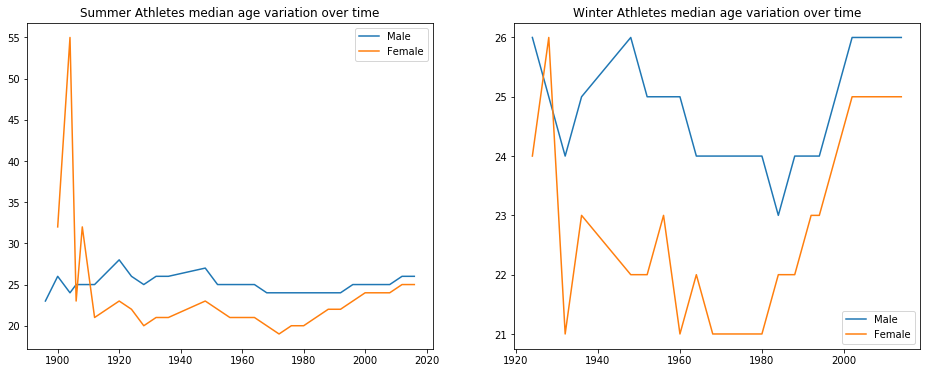

In [12]:
grouped_by_year = {
    'summer_male_df': summer_male_df.groupby('Year').Age.median().astype(int),
    'winter_male_df': winter_male_df.groupby('Year').Age.median().astype(int),
    'summer_female_df': summer_female_df.groupby('Year').Age.median().astype(int),
    'winter_female_df': winter_female_df.groupby('Year').Age.median().astype(int)
}

plt.figure(figsize=(16, 6))

plt.subplot(121)
temp = grouped_by_year['summer_male_df'].reset_index()
plt.plot(temp.Year, temp.Age, label='Male')
temp = grouped_by_year['summer_female_df'].reset_index()
plt.plot(temp.Year, temp.Age, label='Female')

plt.title("Summer Athletes median age variation over time")
plt.legend(loc='best')


plt.subplot(122)
temp = grouped_by_year['winter_male_df'].reset_index()
plt.plot(temp.Year, temp.Age, label='Male')
temp = grouped_by_year['winter_female_df'].reset_index()
plt.plot(temp.Year, temp.Age, label='Female')

plt.title("Winter Athletes median age variation over time")
plt.legend(loc='best')

plt.show()

In [13]:
fill_na_of_df('Age')

In [14]:
display({
    'Avg. Weight(M)(WS)': round(winter_male_df.Weight.mean(), 2),
    'Avg. Weight(M)(SS)': round(summer_male_df.Weight.mean(), 2),
    'Avg. Weight(F)(WS)': round(winter_female_df.Weight.mean(), 2),
    'Avg. Weight(F)(SS)': round(summer_female_df.Weight.mean(), 2),
    'Median. Weight(M)(WS)': round(winter_male_df.Weight.median(), 2),
    'Median. Weight(M)(SS)': round(summer_male_df.Weight.median(), 2),
    'Median. Weight(F)(WS)': round(winter_female_df.Weight.median(), 2),
    'Median. Weight(F)(SS)': round(summer_female_df.Weight.median(), 2)
})

{'Avg. Weight(M)(WS)': 76.36,
 'Avg. Weight(M)(SS)': 75.6,
 'Avg. Weight(F)(WS)': 59.76,
 'Avg. Weight(F)(SS)': 60.09,
 'Median. Weight(M)(WS)': 75.0,
 'Median. Weight(M)(SS)': 74.0,
 'Median. Weight(F)(WS)': 59.0,
 'Median. Weight(F)(SS)': 59.0}

In [15]:
display({
    'Avg. Height(M)(WS)': round(winter_male_df.Height.mean(), 2),
    'Avg. Height(M)(SS)': round(summer_male_df.Height.mean(), 2),
    'Avg. Height(F)(WS)': round(winter_female_df.Height.mean(), 2),
    'Avg. Height(F)(SS)': round(summer_female_df.Height.mean(), 2),
    'Median. Height(M)(WS)': round(winter_male_df.Height.median(), 2),
    'Median. Height(M)(SS)': round(summer_male_df.Height.median(), 2),
    'Median. Height(F)(WS)': round(winter_female_df.Height.median(), 2),
    'Median. Height(F)(SS)': round(summer_female_df.Height.median(), 2)
})

{'Avg. Height(M)(WS)': 178.67,
 'Avg. Height(M)(SS)': 178.9,
 'Avg. Height(F)(WS)': 166.53,
 'Avg. Height(F)(SS)': 168.17,
 'Median. Height(M)(WS)': 179.0,
 'Median. Height(M)(SS)': 179.0,
 'Median. Height(F)(WS)': 167.0,
 'Median. Height(F)(SS)': 168.0}

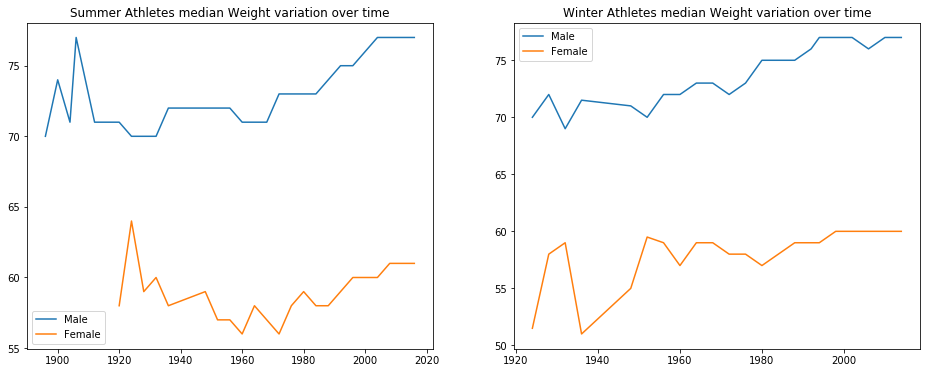

In [16]:
grouped_by_year = {
    'summer_male_df': summer_male_df.groupby('Year').Weight.median(),
    'winter_male_df': winter_male_df.groupby('Year').Weight.median(),
    'summer_female_df': summer_female_df.groupby('Year').Weight.median(),
    'winter_female_df': winter_female_df.groupby('Year').Weight.median()
}

plt.figure(figsize=(16, 6))

plt.subplot(121)
temp = grouped_by_year['summer_male_df'].reset_index()
plt.plot(temp.Year, temp.Weight, label='Male')
temp = grouped_by_year['summer_female_df'].reset_index()
plt.plot(temp.Year, temp.Weight, label='Female')

plt.title("Summer Athletes median Weight variation over time")
plt.legend(loc='best')


plt.subplot(122)
temp = grouped_by_year['winter_male_df'].reset_index()
plt.plot(temp.Year, temp.Weight, label='Male')
temp = grouped_by_year['winter_female_df'].reset_index()
plt.plot(temp.Year, temp.Weight, label='Female')

plt.title("Winter Athletes median Weight variation over time")
plt.legend(loc='best')

plt.show()

In [17]:
fill_na_of_df('Weight')

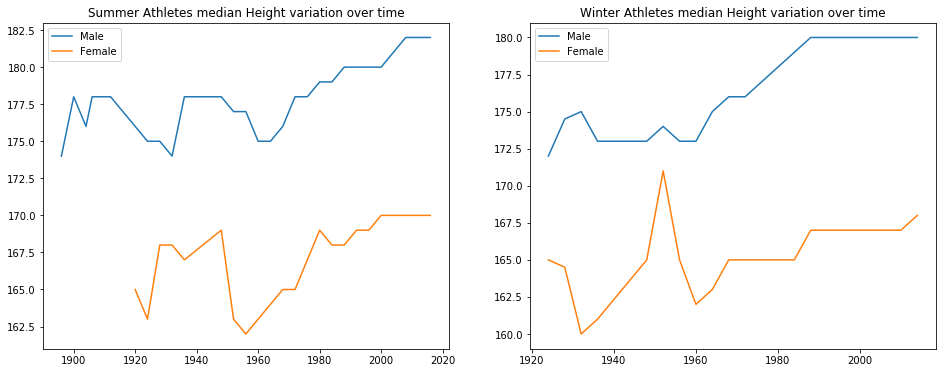

In [18]:
grouped_by_year = {
    'summer_male_df': summer_male_df.groupby('Year').Height.median(),
    'winter_male_df': winter_male_df.groupby('Year').Height.median(),
    'summer_female_df': summer_female_df.groupby('Year').Height.median(),
    'winter_female_df': winter_female_df.groupby('Year').Height.median()
}

plt.figure(figsize=(16, 6))

plt.subplot(121)
temp = grouped_by_year['summer_male_df'].reset_index()
plt.plot(temp.Year, temp.Height, label='Male')
temp = grouped_by_year['summer_female_df'].reset_index()
plt.plot(temp.Year, temp.Height, label='Female')

plt.title("Summer Athletes median Height variation over time")
plt.legend(loc='best')


plt.subplot(122)
temp = grouped_by_year['winter_male_df'].reset_index()
plt.plot(temp.Year, temp.Height, label='Male')
temp = grouped_by_year['winter_female_df'].reset_index()
plt.plot(temp.Year, temp.Height, label='Female')

plt.title("Winter Athletes median Height variation over time")
plt.legend(loc='best')

plt.show()

In [19]:
fill_na_of_df('Height')

In [20]:
df.describe()

,Age,Height,Weight,Year
count,269661.000000,269468.000000,269468.000000,269661.000000
mean,25.453603,175.402578,70.645056,1978.641049
std,6.060325,9.485600,12.817344,29.734037
min,10.000000,127.000000,25.000000,1896.000000
25%,22.000000,170.000000,62.000000,1960.000000
50%,25.000000,176.000000,71.000000,1988.000000
75%,28.000000,180.000000,76.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


In [21]:
df.to_csv('athlete_events_no_null.csv')

In [22]:
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
70195,Alfred Flatow,M,26.0,174.0,70.0,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horse Vault,N/A
115242,Frederick Keeping,M,28.0,174.0,70.0,Great Britain,GBR,1896 Summer,1896,Summer,Athina,Cycling,Cycling Men's 12-Hours Race,Silver
244228,Leonidas Tsiklitiras,M,23.0,174.0,70.0,Greece,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horizontal Bar,N/A
75128,Carl Galle,M,23.0,154.0,45.0,Germany,GER,1896 Summer,1896,Summer,Athina,Athletics,"Athletics Men's 1,500 metres",N/A
84765,Alphonse Grisel,M,23.0,174.0,70.0,France,FRA,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Parallel Bars,N/A


In [23]:
df.describe(include=['O'])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event
count,269661,269661,269661,269661,269661,269661,269661,269661,269661
unique,134732,2,1184,230,51,2,42,66,765
top,Heikki Ilmari Savolainen,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football
freq,39,195286,17598,18603,13821,221097,22291,38624,5733


In [24]:
player_participation_freq_df = df.groupby(['Name', 'Year', 'Season']).size().reset_index().rename(columns={0: 'Freq'})
all_year_freq_df = player_participation_freq_df.groupby('Name').size().reset_index().rename(columns={0: 'Freq'})


In [25]:
player_participation_freq_df.sort_values(by='Freq', ascending=False).head()

,Name,Year,Season,Freq
179482,"Willis Augustus Lee, Jr.",1920,Summer,15
105634,Lloyd Spencer Spooner,1920,Summer,13
118215,Maurice Faure,1906,Summer,12
71771,Ioannis Theofilakis,1912,Summer,12
113581,"Marie Joseph ""Raoul"" le Borgne de Boigne",1906,Summer,12


In [26]:
all_year_freq_df.sort_values(by='Freq', ascending=False).head()

,Name,Freq
50684,Ian Millar,10
50177,Hubert Raudaschl,9
1465,Afanasijs Kuzmins,9
94058,Nino Salukvadze (-Machavariani),8
63668,Josefa Idem-Guerrini,8


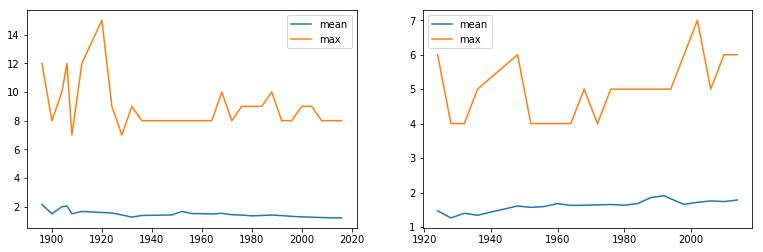

In [27]:
ppf_summer = player_participation_freq_df[player_participation_freq_df.Season == 'Summer'].groupby('Year').Freq.agg(['mean', 'max']).reset_index()
ppf_winter = player_participation_freq_df[player_participation_freq_df.Season == 'Winter'].groupby('Year').Freq.agg(['mean', 'max']).reset_index()

plt.figure(figsize=(13, 4))

plt.subplot(121)
plt.plot(ppf_summer.Year, ppf_summer['mean'], label='mean')
plt.plot(ppf_summer.Year, ppf_summer['max'], label='max')

plt.legend(loc='best')

plt.subplot(122)
plt.plot(ppf_winter.Year, ppf_winter['mean'], label='mean')
plt.plot(ppf_winter.Year, ppf_winter['max'], label='max')

plt.legend(loc='best')

plt.show()


In [28]:
df['bmi'] = df.apply(lambda x: round(x.Weight * (100/x.Height)**2, 2), axis=1)

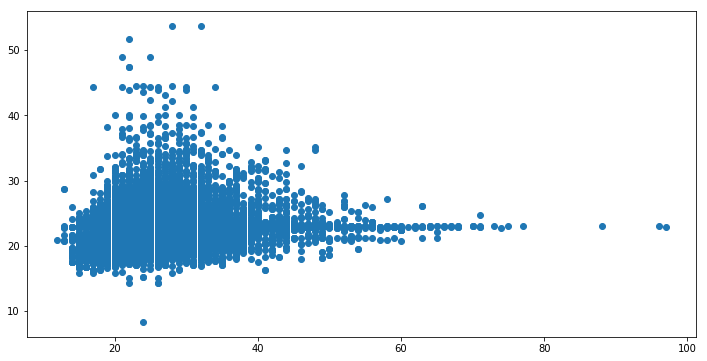

In [29]:
plt.figure(figsize=(12, 6))
temp = df[df.NOC == "USA"]
plt.scatter(temp['Age'], temp['bmi'])

In [30]:
def merge_regions_from_noc(df, noc):
    return df.reset_index().set_index('NOC').join(
        noc.set_index('NOC')
    ).reset_index().sort_values('Year')
    

In [31]:
nocdf.isna().any()

NOC       False
region     True
notes      True
dtype: bool

In [32]:
nocdf[nocdf.region.isna()]

,NOC,region,notes
168,ROT,NaN,Refugee Olympic Team
208,TUV,NaN,Tuvalu
213,UNK,NaN,Unknown


In [33]:
df.drop(df[df.NOC == "UNK"].index, inplace=True)

In [34]:
nocdf.drop(nocdf[nocdf.NOC == "UNK"].index, inplace=True)

In [35]:
nocdf.iloc[208]["region"] = 'Tuvalu'

In [36]:
nocdf[nocdf.region == 'China']

,NOC,region,notes
41,CHN,China,NaN
88,HKG,China,Hong Kong


In [37]:
nocdf[nocdf.NOC == "TUV"]["region"]

208    Tuvalu
Name: region, dtype: object

In [38]:
df.drop(df[(df.NOC == 'TUV') | (df.NOC == 'ROT')].index, inplace=True)

In [39]:
df = merge_regions_from_noc(df, nocdf).drop('notes', axis=1)

In [40]:
df.head()

,NOC,index,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal,bmi,region
106687,GER,121826,Bernard Wilhelm Knubel,M,23.0,174.0,70.0,Germany,1896 Summer,1896,Summer,Athina,Cycling,Cycling Men's 100 kilometres,N/A,23.12,Germany
75540,FRA,84766,Alphonse Grisel,M,23.0,174.0,70.0,France,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Long Jump,N/A,23.12,France
75539,FRA,84763,Alphonse Grisel,M,23.0,174.0,70.0,France,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 100 metres,N/A,23.12,France
75538,FRA,84764,Alphonse Grisel,M,23.0,174.0,70.0,France,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 400 metres,N/A,23.12,France
75537,FRA,84765,Alphonse Grisel,M,23.0,174.0,70.0,France,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Parallel Bars,N/A,23.12,France


In [41]:
df[['Age', 'bmi', 'NOC', 'region', 'Year']].to_csv('bmi_scatter.csv', index=False)

In [42]:
df.groupby(['Sex', 'NOC', 'region', 'Year']).size().to_frame().reset_index().to_csv('sex_scatter.csv', index=False)

In [43]:
df.groupby(['Event', 'Sport', 'Season','Year']).size().to_frame().reset_index().to_csv('games_hierarchy.csv', index=False)

In [46]:
medalsDF = df[df.Medal != "N/A"]

In [47]:
medalsDF

,NOC,index,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal,bmi,region
116745,GRE,48644,Evangelos Damaskos,M,23.0,174.0,70.0,Greece,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Pole Vault,Bronze,23.12,Greece
116738,GRE,194678,"Leonidas ""Leon"" Pyrgos",M,23.0,174.0,70.0,Greece,1896 Summer,1896,Summer,Athina,Fencing,"Fencing Men's Foil, Masters, Individual",Gold,23.12,Greece
75544,FRA,151936,Paul Michel Pierre Adrien Masson (-Nossam),M,19.0,174.0,70.0,France,1896 Summer,1896,Summer,Athina,Cycling,Cycling Men's 333 metres Time Trial,Gold,23.12,France
12715,AUT,170080,Paul Neumann (-Newman),M,20.0,174.0,70.0,Austria,1896 Summer,1896,Summer,Athina,Swimming,Swimming Men's 500 metres Freestyle,Gold,23.12,Austria
12714,AUT,213105,Felix Adolf Schmal,M,23.0,174.0,70.0,Austria,1896 Summer,1896,Summer,Athina,Cycling,Cycling Men's 12-Hours Race,Gold,23.12,Austria
75562,FRA,83614,Eugne Henry Gravelotte,M,20.0,174.0,70.0,France,1896 Summer,1896,Summer,Athina,Fencing,"Fencing Men's Foil, Individual",Gold,23.12,France
75561,FRA,70118,Marie Lon Flameng,M,18.0,174.0,70.0,France,1896 Summer,1896,Summer,Athina,Cycling,Cycling Men's 100 kilometres,Gold,23.12,France
75559,FRA,244717,Pierre Alexandre Tuffri,M,19.0,174.0,70.0,France,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Triple Jump,Silver,23.12,France
75557,FRA,186125,Joanni Maurice Perronet,M,18.0,174.0,70.0,France,1896 Summer,1896,Summer,Athina,Fencing,"Fencing Men's Foil, Masters, Individual",Silver,23.12,France
75556,FRA,137064,Albin Georges Lermusiaux,M,21.0,174.0,70.0,France,1896 Summer,1896,Summer,Athina,Athletics,"Athletics Men's 1,500 metres",Bronze,23.12,France


In [45]:
medalsDF.describe()

,index,Age,Height,Weight,Year,bmi
count,39758.000000,39758.000000,39684.000000,39684.000000,39758.000000,39684.000000
mean,137898.651492,25.916118,177.180703,73.064190,1973.989134,23.112216
std,77930.151003,5.858703,9.788767,13.372549,33.784396,2.662985
min,3.000000,10.000000,136.000000,28.000000,1896.000000,11.680000
25%,71716.500000,22.000000,172.000000,65.000000,1952.000000,21.630000
50%,137275.000000,25.000000,177.000000,72.000000,1984.000000,22.920000
75%,206100.750000,29.000000,183.000000,79.000000,2002.000000,24.220000
max,271103.000000,73.000000,223.000000,182.000000,2016.000000,56.500000


In [49]:
medalsDF.groupby(['region', 'Sport','Season','Event']).size().to_frame().reset_index().to_csv('medals_games.csv', index=False)
